<a href="https://colab.research.google.com/github/linkwine/big_data/blob/master/Traveling_Salesman_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Traveling Sales Man Problem 

Problem Description:

* Find the Lat/Long of all 50 state capitols
* Assume ‘as the crow flies’ (straight line)  travel (helicopter from city hall to city hall)
* Choose a method for solving/optimizing
* Parallelize
* Find the shortest path that touches every place once except the starting point, and return (pick the starting points) 
* Define the problem, choose algorithm, figure out how to run it, did I find the right answer? 

ref: https://en.wikipedia.org/wiki/Travelling_salesman_problem

## Pre Setup

In [0]:
## mount google drive to allow access
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls "./gdrive/Team Drives/Cloud9/"

'BAX 422_Group9.ipynb'	       state_capitals.csv
'BAX 422 - Homework 3.ipynb'   us_states_cap.gsheet
'BAX 422 - Homework 4.ipynb'  'us_states_cap - us_states.csv'
 hw3.gdoc		       us_states.csv
 mnist			       us_states.gsheet
 Record_HW3.gsheet


In [0]:
from math import sin, cos, sqrt, atan2, radians
import pandas as pd

In [0]:
data = pd.read_csv("./gdrive/Team Drives/Cloud9/us_states_cap - us_states.csv")
data.head()

,state,latitude,longitude,name
0,AK,58.301598,-134.420212,Alaska
1,AL,32.377716,-86.300568,Alabama
2,AR,34.746613,-92.288986,Arkansas
3,AZ,33.448143,-112.096962,Arizona
4,CA,38.576668,-121.493629,California


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
state        50 non-null object
latitude     50 non-null float64
longitude    50 non-null float64
name         50 non-null object
dtypes: float64(2), object(2)
memory usage: 1.6+ KB


In [0]:
## count states (remove District of Columbia & Puerto Rico)
len(data)


50

In [0]:
radians(data[data['state']=='CA']['latitude'])

0.6732898710487358

In [0]:
# Calculate the distance btween 2 stateis capital first
# approximate radius of earth in km
R = 6373.0

# # identify 2 cities
lat1 = radians(data[data['state']=='AK']['latitude'])
lon1 = radians(data[data['state']=='AK']['longitude'])
lat2 = radians(data[data['state']=='CA']['latitude'])
lon2 = radians(data[data['state']=='CA']['longitude'])

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

In [0]:
distance  ##from AK -- CA

2382.8020510622882

## Algorithms

Basic method to solve traveling salesman problem would be recursive traversal. However, the runtime complexity of this algorithm is O(2^n).brute force method has a runtime of O(n!) or factorial time.

### 1. Greedy Algorithm

A greedy strategy for the traveling salesman problem is of the following heuristic: "At each stage visit an unvisited city nearest to the current city". This heuristic need not find a best solution, but terminates in a reasonable number of steps; finding an optimal solution typically requires unreasonably many steps.


#### Build Greedy


In [0]:
import numpy as np
import math
import time

In [0]:
v = data.iloc[:,1:3]
 
train_v= np.array(v)
train_d=train_v

dist = np.zeros((train_v.shape[0],train_d.shape[0]))

In [0]:
# ?np.zeros()

In [0]:
v.head()

,latitude,longitude
0,58.301598,-134.420212
1,32.377716,-86.300568
2,34.746613,-92.288986
3,33.448143,-112.096962
4,38.576668,-121.493629


In [0]:
# function to calculate distance
def haversine(lon1, lat1, lon2, lat2):
  """
  Calculate the great circle distance between two points 
  n the earth (specified in decimal degrees).
  Source: https://gis.stackexchange.com/a/56589/15183
  """
  # convert decimal degrees to radians 
  lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
  # haversine formula 
  dlon = lon2 - lon1 
  dlat = lat2 - lat1 
  a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
  c = 2 * math.asin(math.sqrt(a)) 
  distance = 6373 * c  # approximate radius of earth in km --- R = 6373.0
  return distance

In [0]:
distance

2382.8020510622882

In [0]:
# calculate distance
for i in range(train_v.shape[0]):
    for j in range(train_d.shape[0]):
        dist[i,j] = haversine(train_v[i,1],train_v[i,0],train_d[j,1],train_d[j,0]) 

In [0]:
dist[0:3,0:3]

array([[   0.        , 4588.0373093 , 4046.36656887],
       [4588.0373093 ,    0.        ,  614.2594853 ],
       [4046.36656887,  614.2594853 ,    0.        ]])

In [0]:
origin_city_id = []
shortest_dis = []

for origin_id in range(0,49):
  origin_city=origin_id
  from_city=origin_id
  to_city=0
  sumpath=0
  flag = [origin_id]
  travel_city = []

  for n_iterations in range(0,48):
    test_city_number = []
    test_city_dist = []
    for test_city in range(0,49):
      if test_city in flag:
        next
      else:
        test_city_number.append(test_city)
        test_city_dist.append(dist[from_city][test_city])
    sumpath+=min(test_city_dist)
    to_city = test_city_number[test_city_dist.index(min(test_city_dist))]
    travel_city.append(to_city)
    flag.append(to_city)
    from_city=to_city
  sumpath+=dist[from_city][origin_city]
  
  origin_city_id.append(origin_id)
  shortest_dis.append(sumpath)

In [0]:
## shortest route with greedy algo
min(shortest_dis)

31326.169977331487

In [0]:
## start with this city
origin_city_id[shortest_dis.index(min(shortest_dis))]

4

In [0]:
## best route
origin_city=4
from_city=4
to_city=0
sumpath=0
flag = [4]

for n_iterations in range(0,48):
  test_city_number = []
  test_city_dist = []
  for test_city in range(0,49):
    if test_city in flag:
      next
    else:
      test_city_number.append(test_city)
      test_city_dist.append(dist[from_city][test_city])
  sumpath+=min(test_city_dist)
  to_city = test_city_number[test_city_dist.index(min(test_city_dist))]
  travel_city.append(to_city)
  flag.append(to_city)
  from_city=to_city
sumpath+=dist[from_city][origin_city]

#### Greedy's Answer

In [0]:
## verify sumpath is same as above
sumpath

31326.169977331487

In [0]:
## travel sequence
for i in flag:
  print(data['state'][i])

CA
NV
UT
CO
NE
SD
ND
MN
IA
IL
MO
AR
MS
LA
AL
HI
TN
KY
OH
IN
MI
WI
WV
VA
NC
SC
GA
MD
DE
NJ
CT
RI
MA
NH
VT
NY
PA
ME
KS
OK
TX
NM
AZ
ID
OR
WA
MT
AK
FL


### 2. Google's Algorithm

https://developers.google.com/optimization/routing/tsp

#### Set Up

In [0]:
AL    = (32.377716,	-86.300568 )
AK    = (58.301598,	-134.420212)
AZ    = (33.448143,	-112.096962)
AR    = (34.746613,	-92.288986 )
CA    = (38.576668,	-121.493629)
CO    = (39.739227,	-104.984856)
CT    = (41.764046,	-72.682198 )
DE    = (39.157307,	-75.519722 )
FL    = (21.307442,	-157.857376)
GA    = (30.438118,	-84.281296 )
HI		=	(33.749027,	-84.388229 )
ID		=	(43.617775,	-116.199722)
IL		=	(39.798363,	-89.654961 )
IN		=	(39.768623,	-86.162643 )
IA		=	(41.591087,	-93.603729 )
KS		=	(39.048191,	-95.677956 )
KY		=	(38.186722,	-84.875374 )
LA		=	(30.457069,	-91.187393 )
ME		=	(44.307167,	-69.781693 )
MD		=	(38.978764,	-76.490936 )
MA		=	(42.358162,	-71.063698 )
MI		=	(42.733635,	-84.555328 )
MN		=	(44.955097,	-93.102211 )
MS		=	(32.303848,	-90.182106 )
MO		=	(38.579201,	-92.172935 )
MT		=	(46.585709,	-112.018417)
NE		=	(40.808075,	-96.699654 )
NV		=	(39.163914,	-119.766121)
NH		=	(43.206898,	-71.537994 )
NJ		=	(40.220596,	-74.769913 )
NM		=	(35.68224,	-105.939728)
NY		=	(35.78043,	-78.639099 )
NC		=	(46.82085,	-100.783318)
ND		=	(42.652843,	-73.757874 )
OH		=	(39.961346,	-82.999069 )
OK		=	(35.492207,	-97.503342 )
OR		=	(44.938461,	-123.030403)
PA		=	(40.264378,	-76.883598 )
RI		=	(41.830914,	-71.414963 )
SC		=	(34.000343,	-81.033211 )
SD		=	(44.367031,	-100.346405)
TN		=	(36.16581,	-86.784241 )
TX		=	(30.27467,	-97.740349 )
UT		=	(40.777477,	-111.888237)
VT		=	(44.262436,	-72.580536 )
VA		=	(37.538857,	-77.43364  )
WA		=	(47.035805,	-122.905014)
WV		=	(38.336246,	-81.612328 )
WI		=	(43.074684,	-89.384445 )
WY		=	(41.140259,	-104.820236)


In [0]:
city_names = ['AL', 'AK', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
cities = [AL, AK, AR, AZ, CA, CO, CT, DE, FL, GA, HI, IA, ID, IL, IN, KS, KY, LA, MA, MD, ME, MI, MN, MO, MS, MT, NC, ND, NE, NH, NJ, NM, NV, NY, OH, OK, OR, PA, RI, SC, SD, TN, TX, UT, VA, VT, WA, WI, WV, WY]

In [0]:
import math


def dcalc(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [0]:
import numpy as np
dist = np.zeros((len(cities),len(cities)))
for i in range(len(cities)):
    for j in range(len(cities)):
        dist[i,j] = dcalc(cities[i], cities[j])   

#### Build Google's Algorithm

In [0]:
!pip -q install ortools
from ortools.constraint_solver import pywrapcp
from ortools.constraint_solver import routing_enums_pb2


# Distance callback
def create_distance_callback(dist):
  # Create a callback to calculate distances between cities.

  def distance_callback(from_node, to_node):
    return int(dist[from_node][to_node])

  return distance_callback

def tsp(depot):


  tsp_size = len(city_names)
  num_routes = 1
  #depot = 0

  # Create routing model
  if tsp_size > 0:
    routing = pywrapcp.RoutingModel(tsp_size, num_routes, depot)
    search_parameters = pywrapcp.RoutingModel.DefaultSearchParameters()
    # Create the distance callback.
    dist_callback = create_distance_callback(dist)
    routing.SetArcCostEvaluatorOfAllVehicles(dist_callback)
    # Solve the problem.
    assignment = routing.SolveWithParameters(search_parameters)
    if assignment:
      # Solution distance.
      #print ()
      # Display the solution.
      # Only one route here; otherwise iterate from 0 to routing.vehicles() - 1
      route_number = 0
      index = routing.Start(route_number) # Index of the variable for the starting node.
      route = ''
      while not routing.IsEnd(index):
        # Convert variable indices to node indices in the displayed route.
        route += str(city_names[routing.IndexToNode(index)]) + ' -> '
        index = assignment.Value(routing.NextVar(index))
      route += str(city_names[routing.IndexToNode(index)])
      #print ()
    else:
      print ('No solution found.')
  else:
    print ('Specify an instance greater than 0.')
  #print(str(assignment.ObjectiveValue()) + "miles " + route)  
  return (str(assignment.ObjectiveValue()), route) 





  

    100% |████████████████████████████████| 23.7MB 1.2MB/s 


#### Multiprocessing

In [0]:
import multiprocessing as mp
from multiprocessing import Pool


pool = mp.Pool(processes=50)
results = [pool.apply(tsp, args=(x,)) for x in range(len(cities))]


#### Google's Answer

In [0]:
print(min(results))

('26210', 'NV -> CA -> FL -> AK -> WA -> OR -> ID -> MT -> UT -> CO -> WY -> SD -> NC -> MN -> WI -> MI -> OH -> WV -> PA -> ND -> VT -> ME -> NH -> MA -> RI -> CT -> NJ -> DE -> MD -> VA -> NY -> SC -> GA -> AL -> HI -> TN -> KY -> IN -> IL -> IA -> NE -> KS -> MO -> AR -> MS -> LA -> TX -> OK -> NM -> AZ -> NV')


### 3. Genetic Algorithm 

Ref from: 
https://towardsdatascience.com/evolution-of-a-salesman-a-complete-genetic-algorithm-tutorial-for-python-6fe5d2b3ca35


#### Build Genetic Algorithm


In [0]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

In [0]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        lat1 = radians(self.x)
        lon1 = radians(self.y)
        lat2 = radians(city.x)
        lon2 = radians(city.y)
        
        dlon = lon2-lon1
        dlat = lat2-lat1
        #xDis = abs(self.x - city.x)
        #yDis = abs(self.y - city.y)
        #old Euclidean method --  
        #distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
        c = 2 * math.asin(math.sqrt(a)) 
        distance = 6373 * c  # approximate radius of earth in km --- R = 6373.0
        return distance

    def __repr__(self):
        return "(" + str(round(self.x,6)) + "," + str(round(self.y,6)) + ")"
        

In [0]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness


In [0]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [0]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [0]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [0]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [0]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [0]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [0]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children


In [0]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [0]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [0]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration


In [0]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [0]:
cityList = []

for i in range(0,49):
    #cityList.append(City(x= int(v.iloc[i,0]), y=int(v.iloc[i,1])))
    cityList.append(City(x= v.iloc[i,0], y=v.iloc[i,1]))

In [0]:
## inital test on small population and generation
geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.05, generations=2000)

Initial distance: 82426.63081869342
Final distance: 74191.65740261775


[(33,-81),
 (30,-84),
 (33,-84),
 (31,-92),
 (46,-110),
 (40,-85),
 (35,-86),
 (41,-93),
 (41,-77),
 (41,-72),
 (43,-74),
 (43,-71),
 (40,-82),
 (37,-91),
 (39,-104),
 (39,-89),
 (46,-94),
 (39,-98),
 (38,-121),
 (33,-112),
 (42,-71),
 (34,-105),
 (34,-92),
 (47,-101),
 (47,-120),
 (39,-76),
 (44,-85),
 (38,-116),
 (43,-116),
 (58,-134),
 (35,-79),
 (38,-80),
 (32,-86),
 (41,-71),
 (45,-69),
 (44,-72),
 (43,-88),
 (31,-99),
 (43,-99),
 (41,-99),
 (40,-74),
 (37,-84),
 (32,-89),
 (39,-75),
 (39,-111),
 (43,-120),
 (21,-157),
 (35,-97),
 (37,-78)]

#### Genetic's Answer

In [0]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    

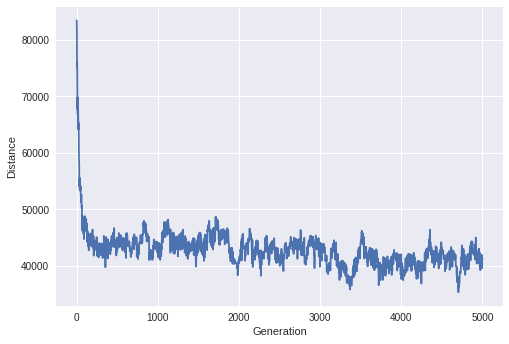

In [0]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=5000)

Comments --the results are far from complete, as the actual population size is 50!  --- how to decrease the runtime of this alorigthm is a challenge.  

-- Ideal result should be around 20,000 miles

## Conclusion

Based on the above tested models, both Greedy and Google's alogorithm were able to complete the job efficiently. Google's final route however was better than Greedy's.

Genetic Algoritm has the potential to provide a better answer, however it is not computationally viable at the moment as we had to restrict the population size and generations to restrict the amount of computation time.

## Add On (Multiprocessing for Genetic Algo)

In [0]:
from time import time

## create class to return multiple parameters from  algo
class GA_Results: 
    def __init__(self,initial_d,final_d,best_route): 
        self.initial_d = initial_d
        self.final_d = final_d
        self.best_route = best_route

In [0]:
## edit algorithm to return back GA_Results object instead of printing
from multiprocessing import Pool

def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    
    pop = initialPopulation(popSize, population)
    
    initial_d = 1 / rankRoutes(pop)[0][1]
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    final_d = 1 / rankRoutes(pop)[0][1]
    
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]

    GA_best = GA_Results(initial_d=initial_d,final_d=final_d,best_route=bestRoute)
    return GA_best

In [0]:
## testing algo 1 run with 1 worker
def runGA(x):
  return (geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=5000))
  
result_initialD = []
result_finalD = []
result_best_route = []
  
start_time = time()

if __name__ == '__main__':
  p = Pool(1)
  results = p.map(runGA, range(1,2))
  for i in results:
    result_initialD.append(i.initial_d)
    result_finalD.append(i.final_d)
    result_best_route.append(i.best_route)
  
end_time = time()
print("runtime：%s"%(end_time-start_time))

runtime：200.31238174438477


In [0]:
result_finalD

[41004.11607343185]

In [0]:
## testing algo 4 runs with 2 workers (2 runs each)
def runGA(x):
  return (geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=5000))
  
result_initialD = []
result_finalD = []
result_best_route = []
  
start_time = time()

if __name__ == '__main__':
  p = Pool(2)
  results = p.map(runGA, range(1,5))
  for i in results:
    result_initialD.append(i.initial_d)
    result_finalD.append(i.final_d)
    result_best_route.append(i.best_route)
  
end_time = time()
print("runtime：%s"%(end_time-start_time))

runtime：568.5369117259979


In [0]:
result_finalD

[37829.149366712925, 46462.9821707884, 44899.54352638741, 44187.71305103832]

In [0]:
## testing algo 8 runs with 4 workers (2 runs each)
def runGA(x):
  return (geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=5000))
  
result_initialD = []
result_finalD = []
result_best_route = []
  
start_time = time()

if __name__ == '__main__':
  p = Pool(4)
  results = p.map(runGA, range(1,9))
  for i in results:
    result_initialD.append(i.initial_d)
    result_finalD.append(i.final_d)
    result_best_route.append(i.best_route)
  
end_time = time()
print("runtime：%s"%(end_time-start_time))

runtime：1146.0241944789886


In [0]:
result_finalD

[45505.28668030181,
 45454.191313283154,
 41743.09188121528,
 43564.50020270857,
 40676.9526876605,
 41645.8678750898,
 41907.55997023744,
 42713.390853205274]

In [0]:
## testing algo 8 runs with 2 workers (4 runs each)
def runGA(x):
  return (geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=5000))
  
result_initialD = []
result_finalD = []
result_best_route = []
  
start_time = time()

if __name__ == '__main__':
  p = Pool(2)
  results = p.map(runGA, range(1,9))
  for i in results:
    result_initialD.append(i.initial_d)
    result_finalD.append(i.final_d)
    result_best_route.append(i.best_route)
  
end_time = time()
print("runtime：%s"%(end_time-start_time))

runtime：1138.8751635551453


In [0]:
result_finalD

[44121.37535683423,
 42192.632093390326,
 42482.757111021565,
 43644.71754808909,
 39586.0471424744,
 42697.744971063345,
 41490.262671704426,
 41933.53079851175]

In [0]:
## testing algo 100 runs with 5 workers (20 runs each)
def runGA(x):
  return (geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=5000))
  
result_initialD = []
result_finalD = []
result_best_route = []
  
start_time = time()

if __name__ == '__main__':
  p = Pool(5)
  results = p.map(runGA, range(1,21))
  for i in results:
    result_initialD.append(i.initial_d)
    result_finalD.append(i.final_d)
    result_best_route.append(i.best_route)
  
end_time = time()
print("runtime：%s"%(end_time-start_time))

runtime：2856.617755174637


In [0]:
## testing algo 100 runs with 5 workers (20 runs each)
def runGA(x):
  return (geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=5000))
  
result_initialD = []
result_finalD = []
result_best_route = []
  
start_time = time()

if __name__ == '__main__':
  p = Pool(5)
  results = p.map(runGA, range(1,21))
  for i in results:
    result_initialD.append(i.initial_d)
    result_finalD.append(i.final_d)
    result_best_route.append(i.best_route)
  
end_time = time()
print("runtime：%s"%(end_time-start_time))

In [0]:
result_finalD

In [0]:
best_route_dist = min(result_finalD)
best_run = result_finalD.index(best_route_dist)
best_route =  result_best_route[best_run]

print ("Best Route Distance:" + str(best_route_dist))
print ("Best Route:" + str(best_route))


Best Route Distance:41004.11607343185
Best Route:[(40.551217,-85.602364), (40.417287,-82.907123), (37.839333,-84.270018), (38.597626,-80.454903), (39.045755,-76.641271), (43.299428,-74.217933), (41.580095,-71.477429), (41.203322,-77.194525), (45.253783,-69.445469), (44.558803,-72.577841), (42.407211,-71.382437), (41.764046,-72.682198), (43.193852,-71.572395), (40.058324,-74.405661), (39.157307,-75.519722), (44.314844,-85.602364), (46.729553,-94.6859), (37.964253,-91.831833), (31.244823,-92.145024), (34.746613,-92.288986), (37.431573,-78.656894), (43.78444,-88.787868), (46.879682,-110.362566), (47.751074,-120.740139), (58.301598,-134.420212), (21.307442,-157.857376), (38.576668,-121.493629), (43.804133,-120.554201), (43.617775,-116.199722), (39.798363,-89.654961), (43.969515,-99.901813), (47.551493,-101.002012), (41.878003,-93.097702), (41.492537,-99.901813), (38.80261,-116.419389), (39.32098,-111.093731), (34.97273,-105.032363), (33.448143,-112.096962), (39.739227,-104.984856), (39.011

In [0]:
for i in best_route:
  cities.index(i)

ValueError: ignored

In [0]:
cities

[(32.377716, -86.300568),
 (58.301598, -134.420212),
 (34.746613, -92.288986),
 (33.448143, -112.096962),
 (38.576668, -121.493629),
 (39.739227, -104.984856),
 (41.764046, -72.682198),
 (39.157307, -75.519722),
 (21.307442, -157.857376),
 (30.438118, -84.281296),
 (33.749027, -84.388229),
 (41.591087, -93.603729),
 (43.617775, -116.199722),
 (39.798363, -89.654961),
 (39.768623, -86.162643),
 (39.048191, -95.677956),
 (38.186722, -84.875374),
 (30.457069, -91.187393),
 (42.358162, -71.063698),
 (38.978764, -76.490936),
 (44.307167, -69.781693),
 (42.733635, -84.555328),
 (44.955097, -93.102211),
 (38.579201, -92.172935),
 (32.303848, -90.182106),
 (46.585709, -112.018417),
 (46.82085, -100.783318),
 (42.652843, -73.757874),
 (40.808075, -96.699654),
 (43.206898, -71.537994),
 (40.220596, -74.769913),
 (35.68224, -105.939728),
 (39.163914, -119.766121),
 (35.78043, -78.639099),
 (39.961346, -82.999069),
 (35.492207, -97.503342),
 (44.938461, -123.030403),
 (40.264378, -76.883598),
 (41